<a href="https://colab.research.google.com/github/Salah-Mo-hammed/Prediction_of_Product_Sales/blob/main/project1Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## loading Data

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pandas as pd
df_sales=pd.read_csv("/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv")

In [64]:
df_sales.info()
uncleaned_df=df_sales.copy()
uncleaned_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [65]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data cleaning

In [66]:
# check for duplicated values
df_sales.duplicated().sum() # np.int64(0) then there is no duplicates
df_sales[df_sales.duplicated()] # to be sure show me the duplicates (no duplicates)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [67]:
# check for NaN values
null_count=df_sales.isna().sum() # item_weght 1463 ,Outlet_Size 2410
null_percent=null_count/len(df_sales)*100
null_percent # show the percent of null values for each col


,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


In [68]:
# display all cat_cols and num_cols
cat_cols=df_sales.select_dtypes("object").columns
num_cols=df_sales.select_dtypes("number").columns
print(f"nums cols are{num_cols} ")
print('\n')
print(f"cat cols are{cat_cols} ")


nums cols areIndex(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object') 


cat cols areIndex(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object') 


In [69]:
df_sales[cat_cols].isna().sum() # Outlet_Size has 2410 nan value , we will replace it with Missing value (categorical)
df_sales['Outlet_Size']=df_sales['Outlet_Size'].fillna("Missing value here")
df_sales[cat_cols].isna().sum() # done replacing it

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


In [70]:
# now the same for numaric cols
df_sales[num_cols].isna().sum() # i know i made it above but just to be all in front of me (Item_Weight has 1463)
# we can fill it with -1 or what value we want , as mean , medain , any central tendency
df_sales['Item_Weight']=df_sales['Item_Weight'].fillna(-1) # i can take a look on the table and see the relasion ship between this and any column and fill the best value in it
df_sales[num_cols].isna().sum() # done

,0
Item_Weight,0
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0
Item_Outlet_Sales,0


In [71]:
# take a look in inconsistent values , now cat cols
for col in cat_cols:
  print(f"let's see the  uniqe values in : {col} ")
  print(df_sales[col].value_counts())
  print("\n ***********************")
  # Item_Fat_Content{LF:Low Fat ,low fat :Low Fat ,reg :Regular}
  #

let's see the  uniqe values in : Item_Identifier 
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64

 ***********************
let's see the  uniqe values in : Item_Fat_Content 
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

 ***********************
let's see the  uniqe values in : Item_Type 
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Na

In [72]:
df_sales['Item_Fat_Content']=df_sales['Item_Fat_Content'].replace({'LF':'Low Fat' ,'low fat' :'Low Fat' ,'reg':'Regular'})
df_sales['Item_Fat_Content'].value_counts()
# this is for project part 4
uncleaned_df['Item_Fat_Content']=uncleaned_df['Item_Fat_Content'].replace({'LF':'Low Fat' ,'low fat' :'Low Fat' ,'reg':'Regular'})
uncleaned_df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [73]:
df_sales.isna().sum() # done cleaning the data , still one thing , see type of columns

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [74]:
df_sales[cat_cols].value_counts()

Item_Identifier  Item_Fat_Content  Item_Type    Outlet_Identifier  Outlet_Size         Outlet_Location_Type  Outlet_Type      
NCZ54            Low Fat           Household    OUT049             Medium              Tier 1                Supermarket Type1    1
DRA12            LF                Soft Drinks  OUT035             Small               Tier 2                Supermarket Type1    1
                 Low Fat           Soft Drinks  OUT010             Missing value here  Tier 3                Grocery Store        1
                                                OUT013             High                Tier 3                Supermarket Type1    1
                                                OUT017             Missing value here  Tier 2                Supermarket Type1    1
                                                                                                                                 ..
DRA59            Regular           Soft Drinks  OUT017             Missing value here  Tier 2                Supermarket Type1    1
                                                OUT013             High                Tier 3                Supermarket Type1    1
                                                OUT010             Missing value here  Tier 3                Grocery Store        1
DRA24            Regular           Soft Drinks  OUT049             Medium              Tier 1                Supermarket Type1    1
                                                OUT035             Small               Tier 2                Supermarket Type1    1
Name: count, Length: 8523, dtype: int64

In [75]:
len(df_sales) # how many rows

8523

In [76]:
df_sales.dtypes
# df_sales['Outlet_Size']

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [77]:
df_sales[num_cols].describe() # or make a loop if you want just mean ,median , and max

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# project 1-part 3 (core)

## histogram of num features

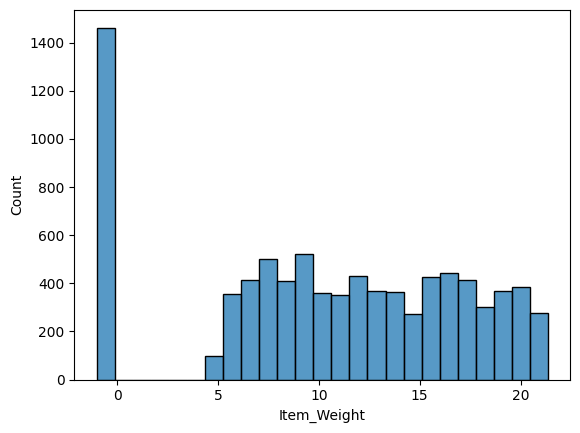

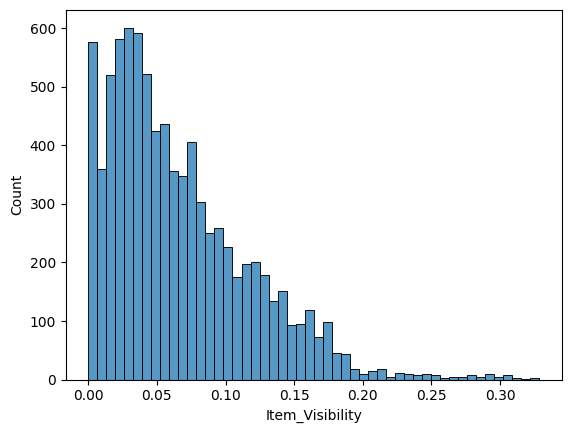

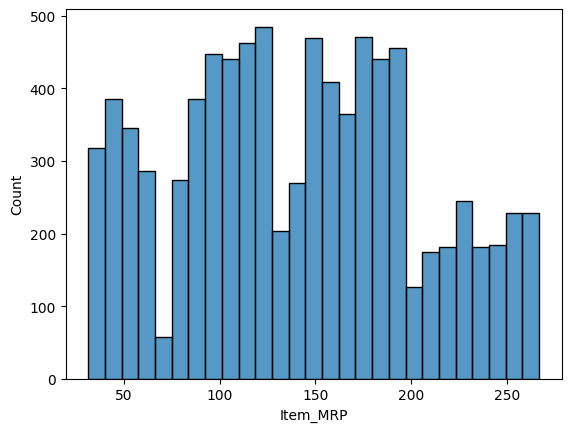

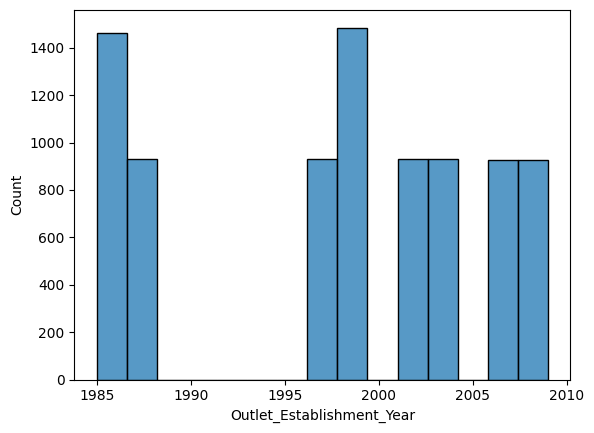

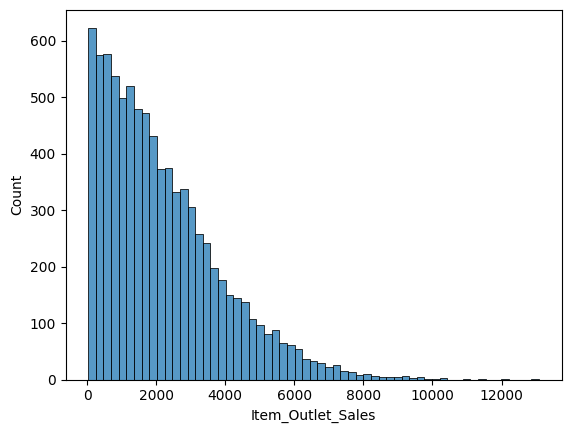

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
  ax=sns.histplot(data=df_sales,x=col)
  # other way
  # ax=df_sales[col].hist()
  # ax.set(title=f"{col}")
  plt.show()


## BoxPlots for num features

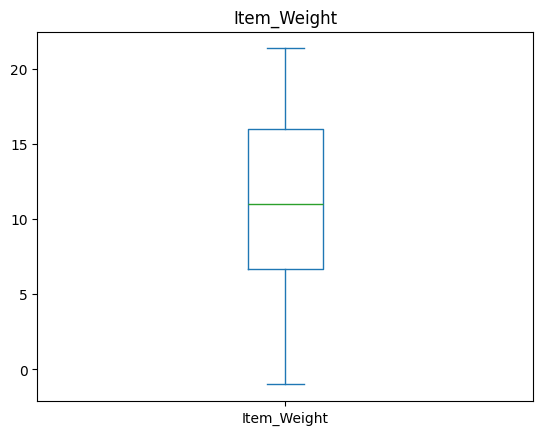

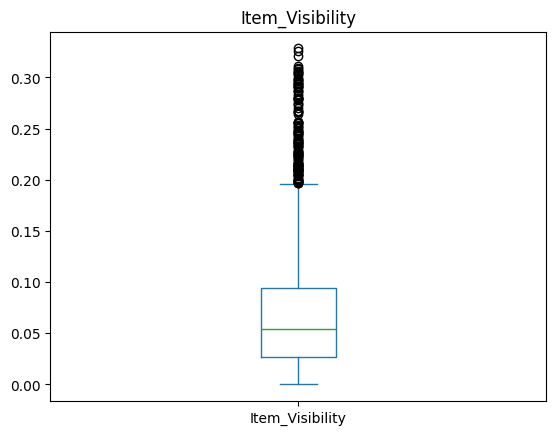

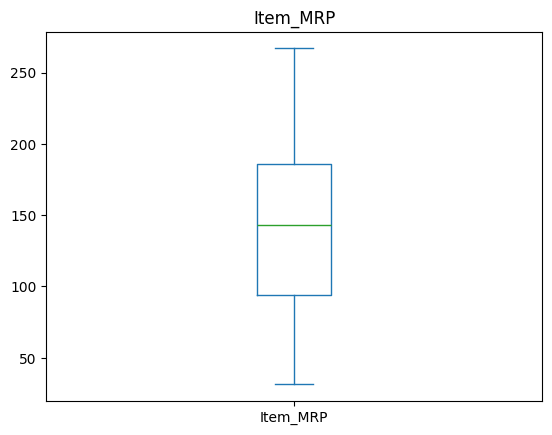

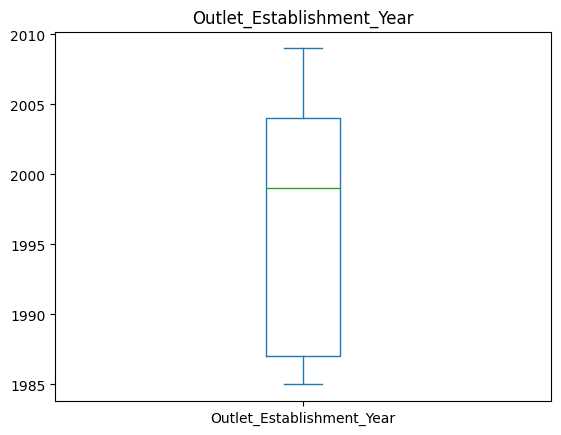

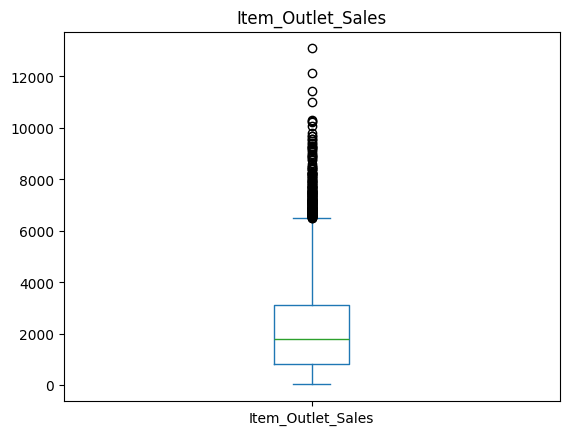

In [79]:
for col in num_cols:
  # ax=sns.boxplot(data=df_sales,x=col)
  # other way
  ax=df_sales[col].plot(kind='box')
  ax.set(title=f"{col}")
  plt.show()

## countplots for cat cols

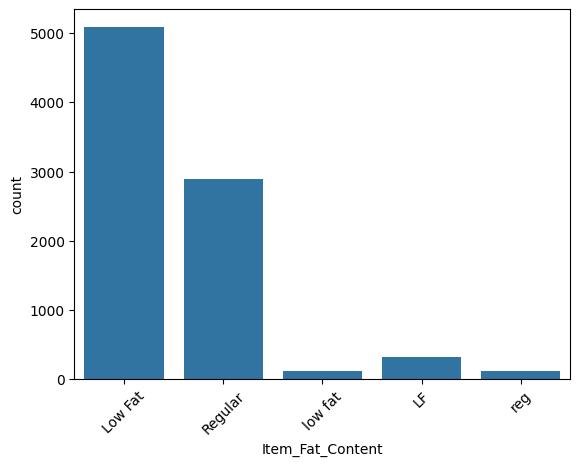

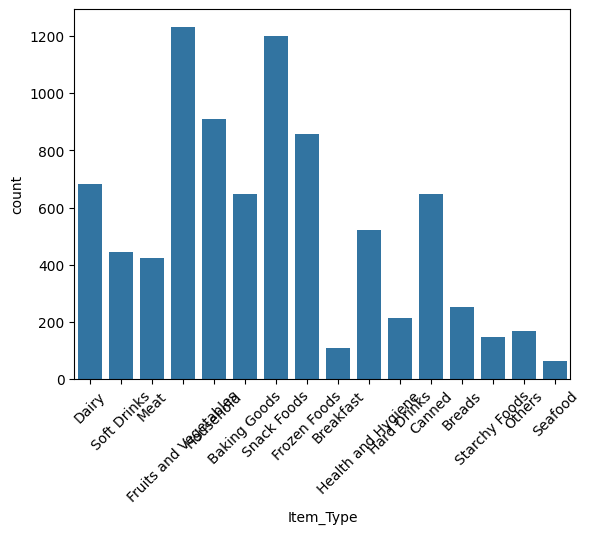

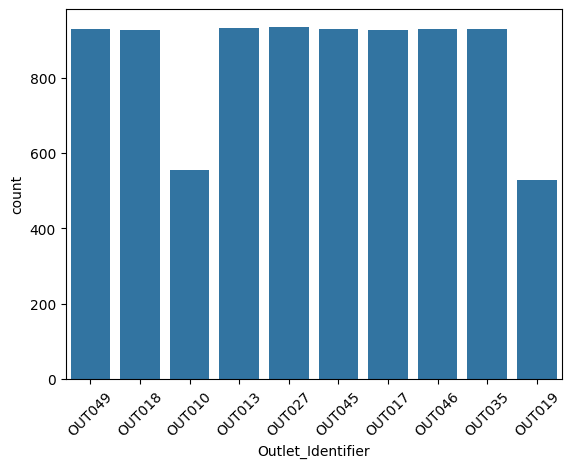

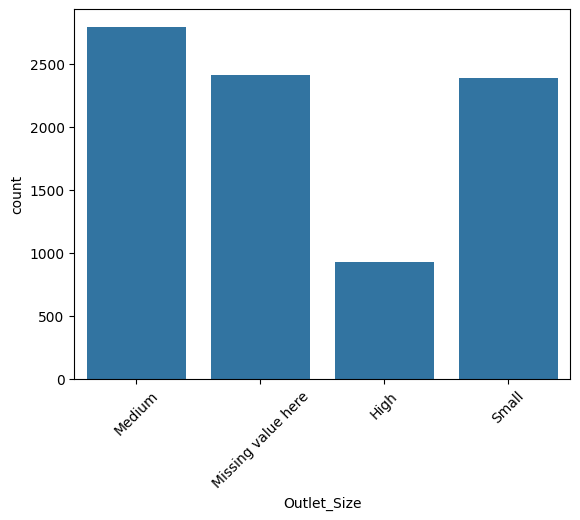

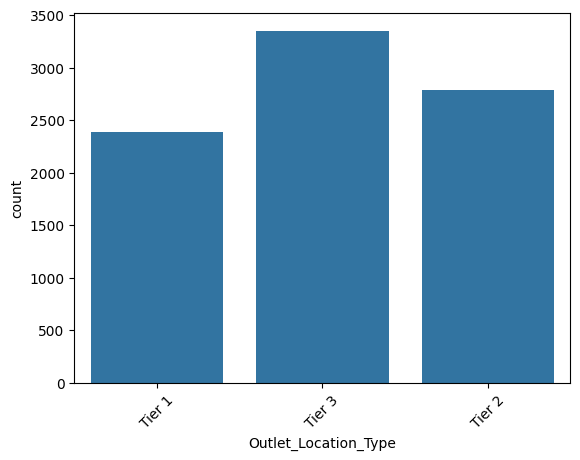

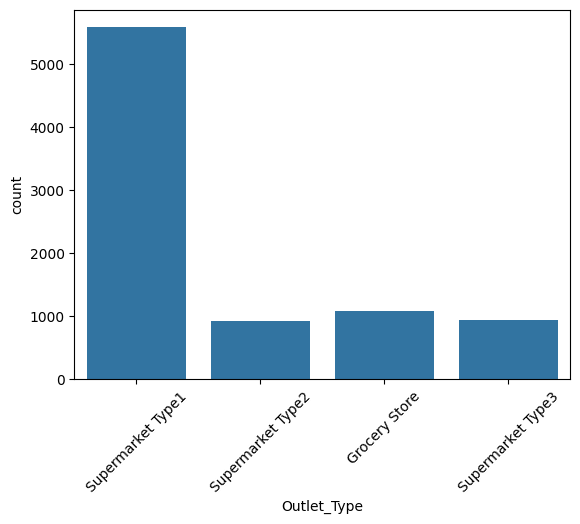

In [80]:
for col in cat_cols:
  if(col!='Item_Identifier'): # because Item_Identifier has 1559 row , and there is no need to see the distripution of it
    ax=sns.countplot(data=df_sales,x=col)
    plt.xticks(rotation=45)
    plt.show()

## heatmap for corr between num features

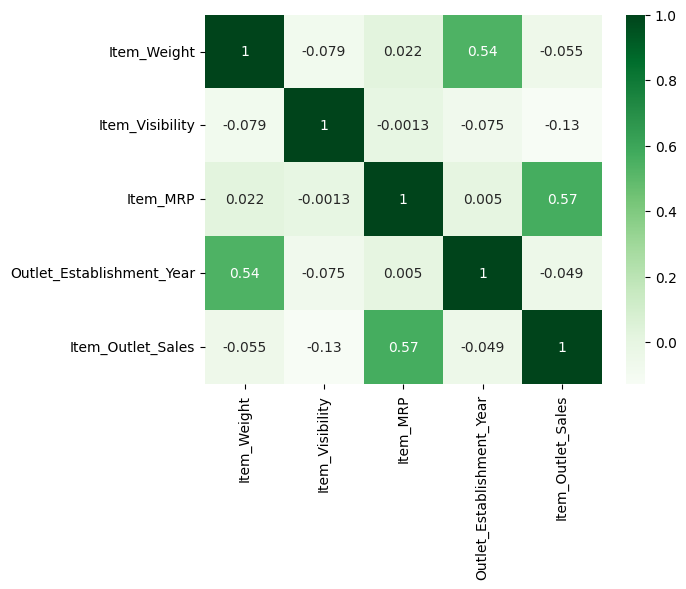

In [81]:
corr= df_sales.corr(numeric_only=True)
ax=sns.heatmap(corr,cmap='Greens',annot=True)

#project 1 part 4 :

In [87]:
uncleaned_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Answer the following questions in a Markdown cell in your Colab Notebook:


target is Item_Outlet_Sales

In [82]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [124]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax,scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax


- Define your target column:
  - rating


* features:
* categorical : Item_Fat_Content , Item_Type ,Outlet_Size , Outlet_Location_Type ,Outlet_Type

* numeircal : Item_Visibility, Item_MRP , Outlet_Establishment_Year  


## Inspect each feature:

### Item_Fat_Content (Categorical )

- Item_Fat_Content:	Whether the product is low-fat or regular
  

In [104]:
# Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
uncleaned_df[feature].dtype

dtype('O')

<ipython-input-92-d4c1ca917ec5>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


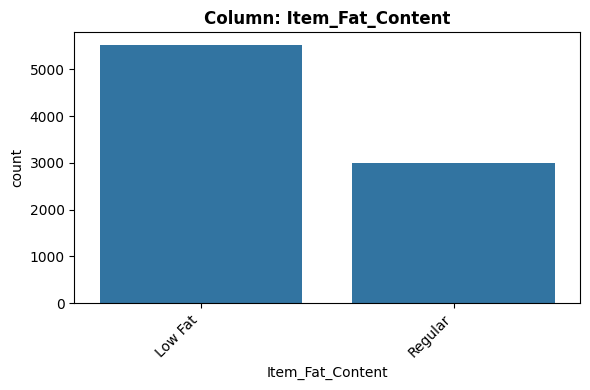

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [105]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(uncleaned_df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical ,ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0. Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 2 unique values (very low).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



<ipython-input-98-e7140bf1751a>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


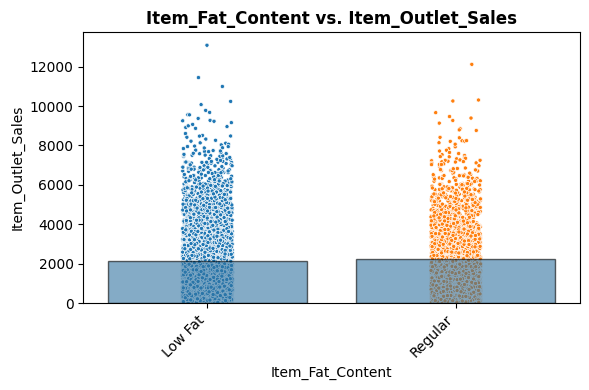

In [106]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(uncleaned_df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes , I think cleints tend to low fat products more than others
  - Does this feature appear to be a predictor of the target?
    - yes , but not that much .

___

### Item_Type (Categorical )

- Item_Type:	The category to which the product belongs

  

In [107]:
# Confirming the dtype to select correct EDA function
feature = "Item_Type"
uncleaned_df[feature].dtype

dtype('O')

<ipython-input-92-d4c1ca917ec5>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


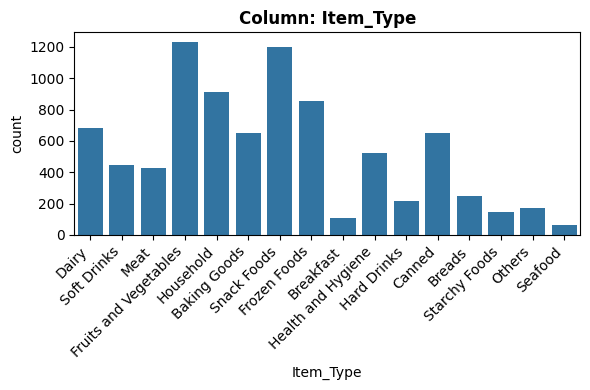

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [108]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(uncleaned_df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical ,nominal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0. Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No. 14 .46 < 98

4. What is the cardinality? Is it high?
  - 16 unique values (very high).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



<ipython-input-98-e7140bf1751a>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


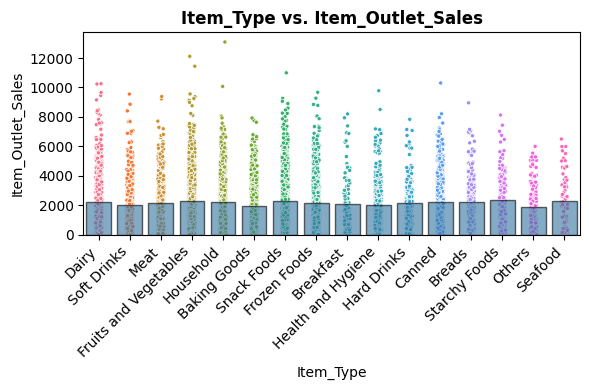

In [109]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(uncleaned_df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes , because diffirent types have diffirent sale behavours (is simple way : demends on demand ) and may clents tend to some of types

  - Does this feature appear to be a predictor of the target?
    - yes

___

### Outliet_Size (Categorical )

- Outlet_Size:	The size of the store in terms of ground area covered

  

In [110]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
uncleaned_df[feature].dtype

dtype('O')

<ipython-input-92-d4c1ca917ec5>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


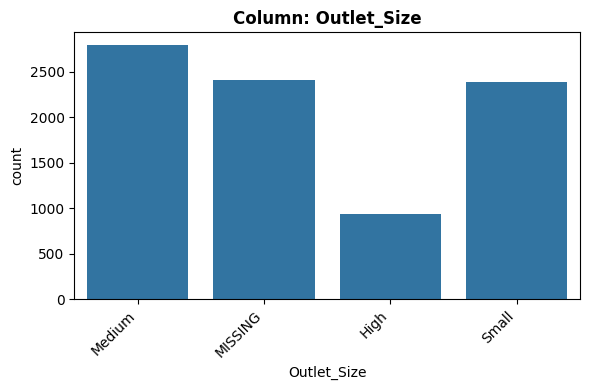

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [111]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(uncleaned_df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical ,ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 , 28.28%. impute with median.

3. Is the feature constant or quasi-constant?
  - No. 32.77 < 98

4. What is the cardinality? Is it high?
  - 4 unique values (low).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



<ipython-input-98-e7140bf1751a>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


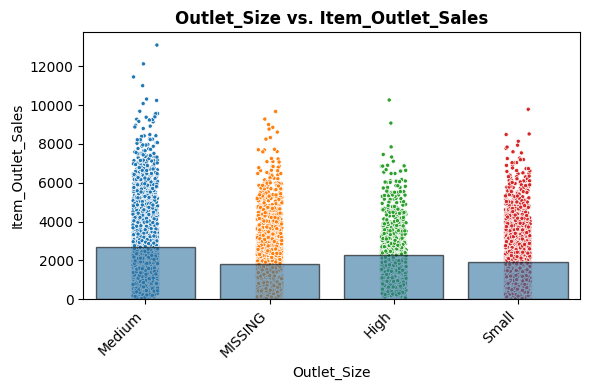

In [112]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(uncleaned_df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes , I think cleints tend to get products from big , or known stores
  - Does this feature appear to be a predictor of the target?
    - yes , it seems that medium , and high stores have higher sales  than the small .

___

### Outlet_Location_Type (Categorical )

- Outlet_Location_Type:The type of area in which the store is located
  

In [113]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
uncleaned_df[feature].dtype

dtype('O')

<ipython-input-92-d4c1ca917ec5>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


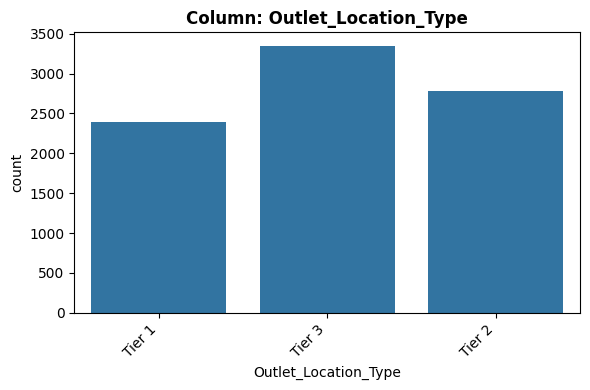

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [114]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(uncleaned_df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical ,nominal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0. Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No. 39.31 < 98

4. What is the cardinality? Is it high?
  - 3 unique values (very low).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



<ipython-input-98-e7140bf1751a>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


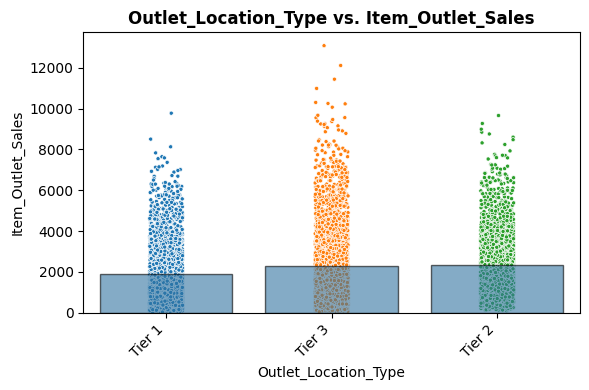

In [115]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(uncleaned_df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes , if area is rich , then sales rate will be higher

  - Does this feature appear to be a predictor of the target?
    - yes , it seems that  tier 1 haave low sales rate unlike the teir 3
     , ithink because of the buying power .

___

### Outlet_Type (Categorical )

- Outlet_Type:Whether the outlet is a grocery store or some sort of supermarket

  

In [116]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
uncleaned_df[feature].dtype

dtype('O')

<ipython-input-92-d4c1ca917ec5>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


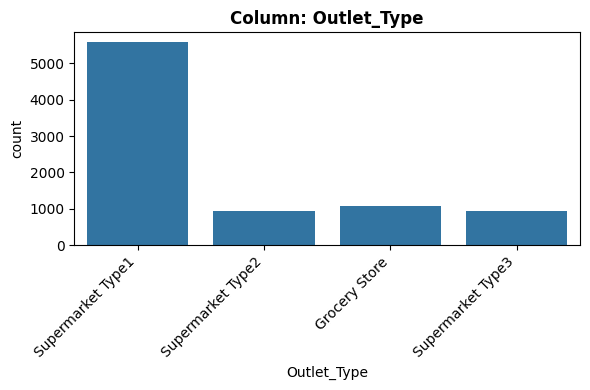

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [117]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(uncleaned_df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical ,nominal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0. Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique values (low).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



<ipython-input-98-e7140bf1751a>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


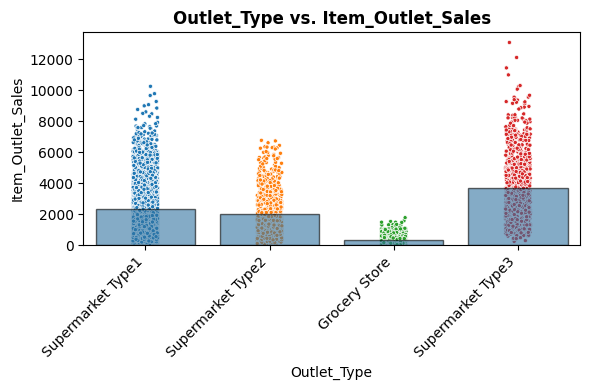

In [118]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(uncleaned_df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes , I think cleints tend to get products from one place ,
  - Does this feature appear to be a predictor of the target?
    - yes , we can see that grocery is the lowest (in the mean and the data point) means that people tend to buy from bigger supemarkets that provide more product types .

___

* numeircal : Item_Visibility, Item_MRP , Outlet_Establishment_Year

### Item_Visibility (numerical)

- Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product
  

In [119]:
# Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
uncleaned_df[feature].dtype

dtype('float64')

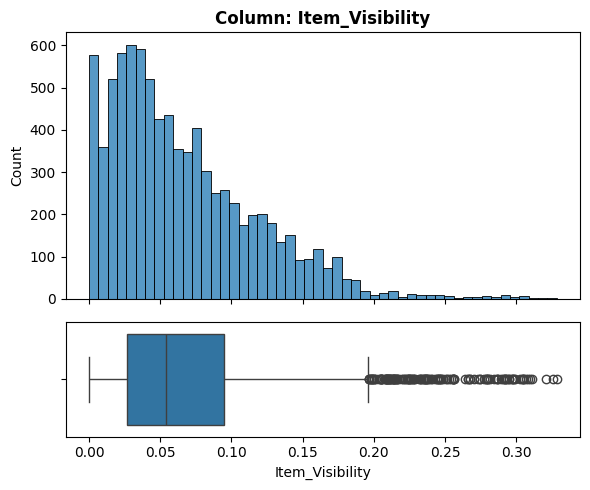

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [120]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(uncleaned_df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



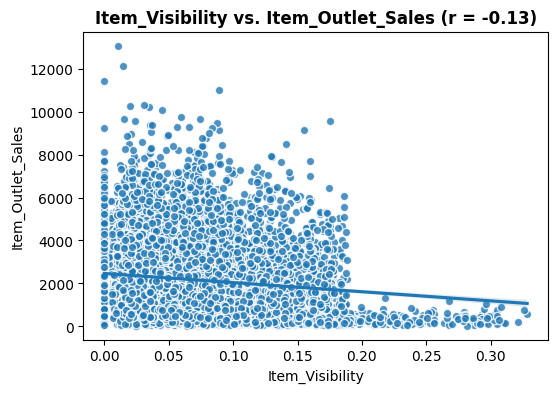

In [125]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(uncleaned_df,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I would assume higher visibilty = higher cleint attention  then = higher sales rate

  - Does this feature appear to be a predictor of the target?
    - Yes! , as i said

___

###  Item_MRP (numerical)

- Item_MRP :Maximum Retail Price (list price) of the product

  

In [126]:
# Confirming the dtype to select correct EDA function
feature = "Item_MRP"
uncleaned_df[feature].dtype

dtype('float64')

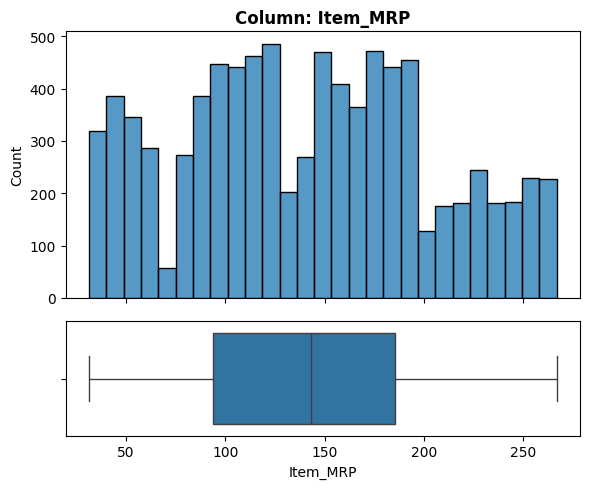

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [127]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(uncleaned_df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



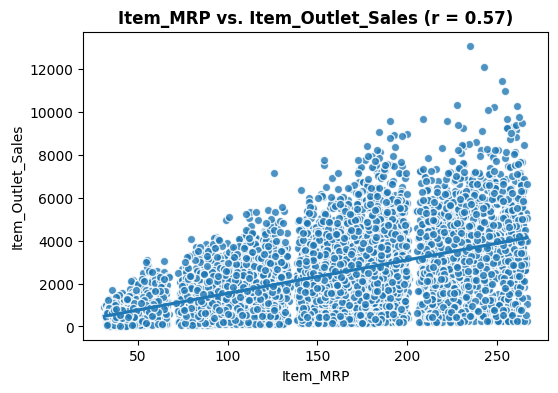

In [128]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(uncleaned_df,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, higher-priced products can get higher sale rate , even if quntity wasnt vety high

  - Does this feature appear to be a predictor of the target?
    - Yes! , there is positive trendline ,when product mpr price increase , the outliet sale also increase

___

### Outlet_Establishment_Year (numerical)

- Outlet_Establishment_Year: The year in which store was established
  

In [129]:
# Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
uncleaned_df[feature].dtype

dtype('int64')

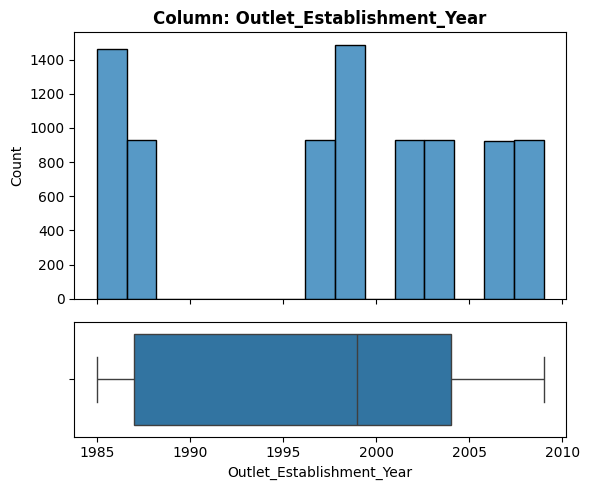

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [130]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(uncleaned_df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



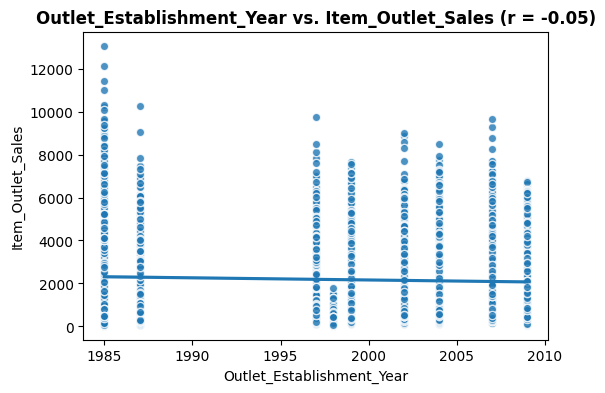

In [131]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(uncleaned_df,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, olfer stores will have higher sales , because they took time longer thatn the new stores to build client confidence ( benreabbe zaboun)

  - Does this feature appear to be a predictor of the target?
    - not that much , and we can say no corr ,even that stores were build in 1985 have higher item sales

___